In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
clustering_data = customers.merge(transactions.groupby('CustomerID').agg({'TotalValue': 'sum'}).reset_index(), on='CustomerID')
clustering_data['SignupDate'] = pd.to_datetime(clustering_data['SignupDate'])
clustering_data['SignupYear'] = clustering_data['SignupDate'].dt.year
clustering_data.drop(['CustomerName', 'SignupDate'], axis=1, inplace=True)

In [7]:
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(clustering_data[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))
clustering_data = pd.concat([clustering_data.drop('Region', axis=1), region_encoded_df], axis=1)


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.drop('CustomerID', axis=1))


In [9]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
clustering_data['Cluster'] = kmeans_labels


C:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
db_index = davies_bouldin_score(scaled_data, kmeans_labels)
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 0.8581876573884915
Silhouette Score: 0.4827623130400012


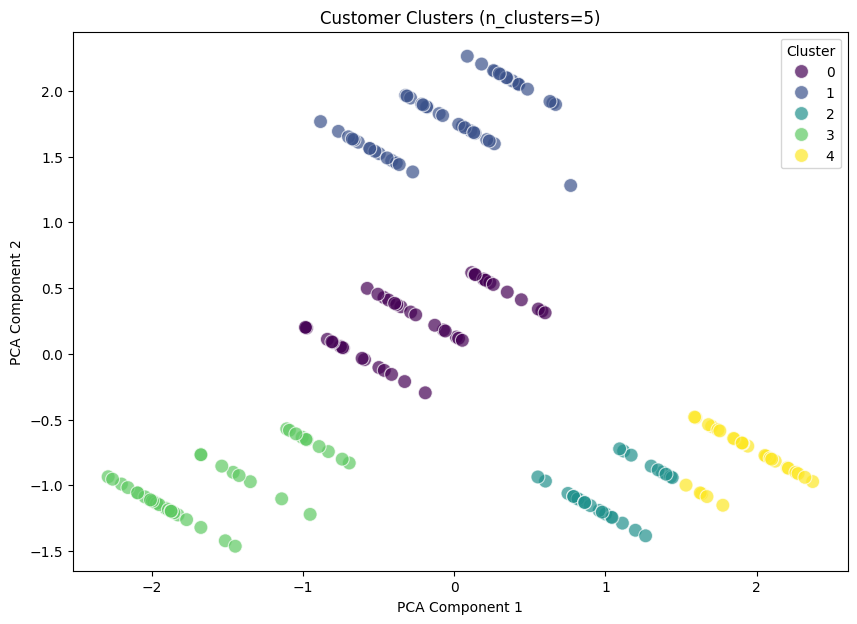

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title(f"Customer Clusters (n_clusters={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [12]:
clustering_data.to_csv("Gade_Sailikhitha_Clustering.csv", index=False)